In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline
def up_lower_sample_data(df, up_percent=0.68, lower_percent=1.88):
    data1= df[df['Churn']==0]  #多樣本
    data0= df[df['Churn']==1]  #低樣本
    np.random.seed(28)
    up_index = np.random.randint(
        len(data0),size= int(up_percent * (len(df)-len(data0))))
    up_data0 = data0.iloc[list(up_index)]
    lower_index = np.random.randint(
        len(data1),size= int(lower_percent * (len(df)-len(data1))))
    lower_data1= data1.iloc[list(lower_index)]
    return(pd.concat([up_data0,lower_data1]))

#    arr1 = np.random.randint(6, size=(100,5))
#    arr2 = np.random.randint(1000,1010,size=(10,5))
#    columns = ['A', 'B', 'C', 'D', 'E']
#    df1= pd.DataFrame(arr1, columns=columns)
#    df1['Label']=0
#    df2= pd.DataFrame(arr2, columns=columns)
#    df2['Label']=1
#    df= pd.concat([df1,df2])
#    print(up_lower_sample_data(df))


def lowerSample(df,percent=1):
    data_more = df[df['Churn']==0]  #類別多
    data_less = df[df['Churn']==1]  #類別少
    np.random.seed(61)
    index = np.random.randint(len(data_more),size = percent*(len(df)-len(data_more)))
    lower_data_more = data_more.iloc[list(index)]   #下採樣
    undersampling_data = pd.concat([lower_data_more, data_less])
    return (undersampling_data)
def ScoreChart(mode, accuracy, recall, precision, f1):
    mode = str(mode)
    t_scores = [accuracy, recall, precision, f1]
    t_scores_name = ['accuracy', 'recall', 'precision', 'f1']
    t_scores_chart = pd.DataFrame(t_scores, t_scores_name)
    if 'y' in mode:
        print(t_scores_chart)


def ScoreReport(y_t, predictions_t):
    accuracy = sklearn.metrics.accuracy_score(y_t, predictions_t)
    recall = sklearn.metrics.recall_score(y_t, predictions_t)
    precision = sklearn.metrics.precision_score(y_t, predictions_t)
    f1 = sklearn.metrics.f1_score(y_t, predictions_t)
    cm = confusion_matrix(y_t, predictions_t)
    print(cm)
    t_scores = [accuracy, recall, precision, f1]
    return t_scores


def ScoreList(mode, y_t, predictions_t):
    mode = str(mode)
    accuracy, recall, precision, f1, cm = ScoreReport(mode, y_t, predictions_t)
    auc_val_value.append(accuracy)
    recall_val_value.append(recall)
    prec_val_value.append(precision)
    f1_val_value.append(f1)
    cm_val_value.append(cm)
    return auc_val_value, recall_val_value, prec_val_value, f1_val_value, cm_val_value


def roc(title, y_t, predictions_t):
    fpr, tpr, thresholds = roc_curve(y_t, predictions_t)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (title, roc_auc))
    #plt.plot([0, 1], [0, 1], color='green', linestyle='--')

def rocshow(title):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
dataname = "/content/drive/MyDrive/資料探勘/流失.csv"

data = pd.read_csv(dataname)



#df  = df.drop(columns=['gender','PhoneService','MultipleLines','StreamingTV','StreamingMovies'])



In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [ ]:
data['tenure']=pd.cut(data['tenure'],bins=5,right=False)
data['tenure'].unique()


[[1.0, 15.2), [29.4, 43.6), [43.6, 57.8), [15.2, 29.4), [57.8, 72.071)]
Categories (5, interval[float64, left]): [[1.0, 15.2) < [15.2, 29.4) < [29.4, 43.6) < [43.6, 57.8) <
                                          [57.8, 72.071)]

In [ ]:
data['MonthlyCharges']=pd.cut(data['MonthlyCharges'],bins=5,right=False)
data['MonthlyCharges'].unique()

[[18.25, 38.35), [38.35, 58.45), [58.45, 78.55), [98.65, 118.85), [78.55, 98.65)]
Categories (5, interval[float64, left]): [[18.25, 38.35) < [38.35, 58.45) < [58.45, 78.55) <
                                          [78.55, 98.65) < [98.65, 118.85)]

In [ ]:

data['TotalCharges']=pd.cut(data['TotalCharges'],bins=5,right=False)
data['TotalCharges'].unique()

[[18.8, 1752.0), [1752.0, 3485.2), [3485.2, 5218.4), [5218.4, 6951.6), [6951.6, 8693.466)]
Categories (5, interval[float64, left]): [[18.8, 1752.0) < [1752.0, 3485.2) < [3485.2, 5218.4) <
                                          [5218.4, 6951.6) < [6951.6, 8693.466)]

In [ ]:
data['tenure']=data['tenure'].astype('str')
data['tenure']=data['tenure'].map({'[1.0, 15.2)':0,'[15.2, 29.4)':1,'[29.4, 43.6)':2,'[43.6, 57.8)':3,'[57.8, 72.071)':4})
data['MonthlyCharges']=data['MonthlyCharges'].astype('str')
data['MonthlyCharges']=data['MonthlyCharges'].map({'[18.25, 38.35)':0,'[38.35, 58.45)':1,'[58.45, 78.55)':2,'[78.55, 98.65)':3,'[98.65, 118.85)':4})
data['TotalCharges']=data['TotalCharges'].astype('str')
data['TotalCharges']=data['TotalCharges'].map({'[18.8, 1752.0)':0,'[1752.0, 3485.2)':1,'[3485.2, 5218.4)':2,'[5218.4, 6951.6)':3,'[6951.6, 8693.466)':4})

In [ ]:

data = up_lower_sample_data(data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4900,1,1,1,0,2,1,1,2,0,0,0,0,1,0,0,1,1,3,1,1
5841,1,1,0,0,4,0,2,1,0,0,0,0,1,1,1,1,1,1,1,1
4965,0,0,0,0,0,0,2,1,0,0,1,0,1,1,0,1,1,1,0,1
3999,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,1,2,0,1
4903,0,0,0,0,0,1,1,2,0,1,0,0,1,0,0,1,1,3,0,1


In [ ]:
data = pd.get_dummies(data, columns=["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","PaymentMethod",'MultipleLines','StreamingTV','StreamingMovies'])

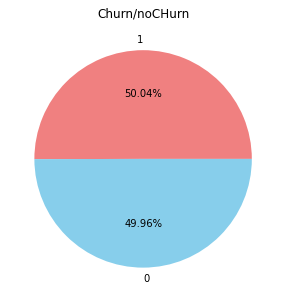

1    3518
0    3513
Name: Churn, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(10,5) )
    # 顯示圖框架大小
data["Churn"].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Churn/noCHurn' )  # 圖標題
plt.ylabel( '' )
plt.show()
data["Churn"].value_counts()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 4900 to 5814
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              7031 non-null   int64
 1   SeniorCitizen       7031 non-null   int64
 2   Partner             7031 non-null   int64
 3   Dependents          7031 non-null   int64
 4   tenure              7031 non-null   int64
 5   PhoneService        7031 non-null   int64
 6   PaperlessBilling    7031 non-null   int64
 7   MonthlyCharges      7031 non-null   int64
 8   TotalCharges        7031 non-null   int64
 9   Churn               7031 non-null   int64
 10  InternetService_0   7031 non-null   uint8
 11  InternetService_1   7031 non-null   uint8
 12  InternetService_2   7031 non-null   uint8
 13  OnlineSecurity_0    7031 non-null   uint8
 14  OnlineSecurity_1    7031 non-null   uint8
 15  OnlineSecurity_2    7031 non-null   uint8
 16  OnlineBackup_0      7031 non-null   uin

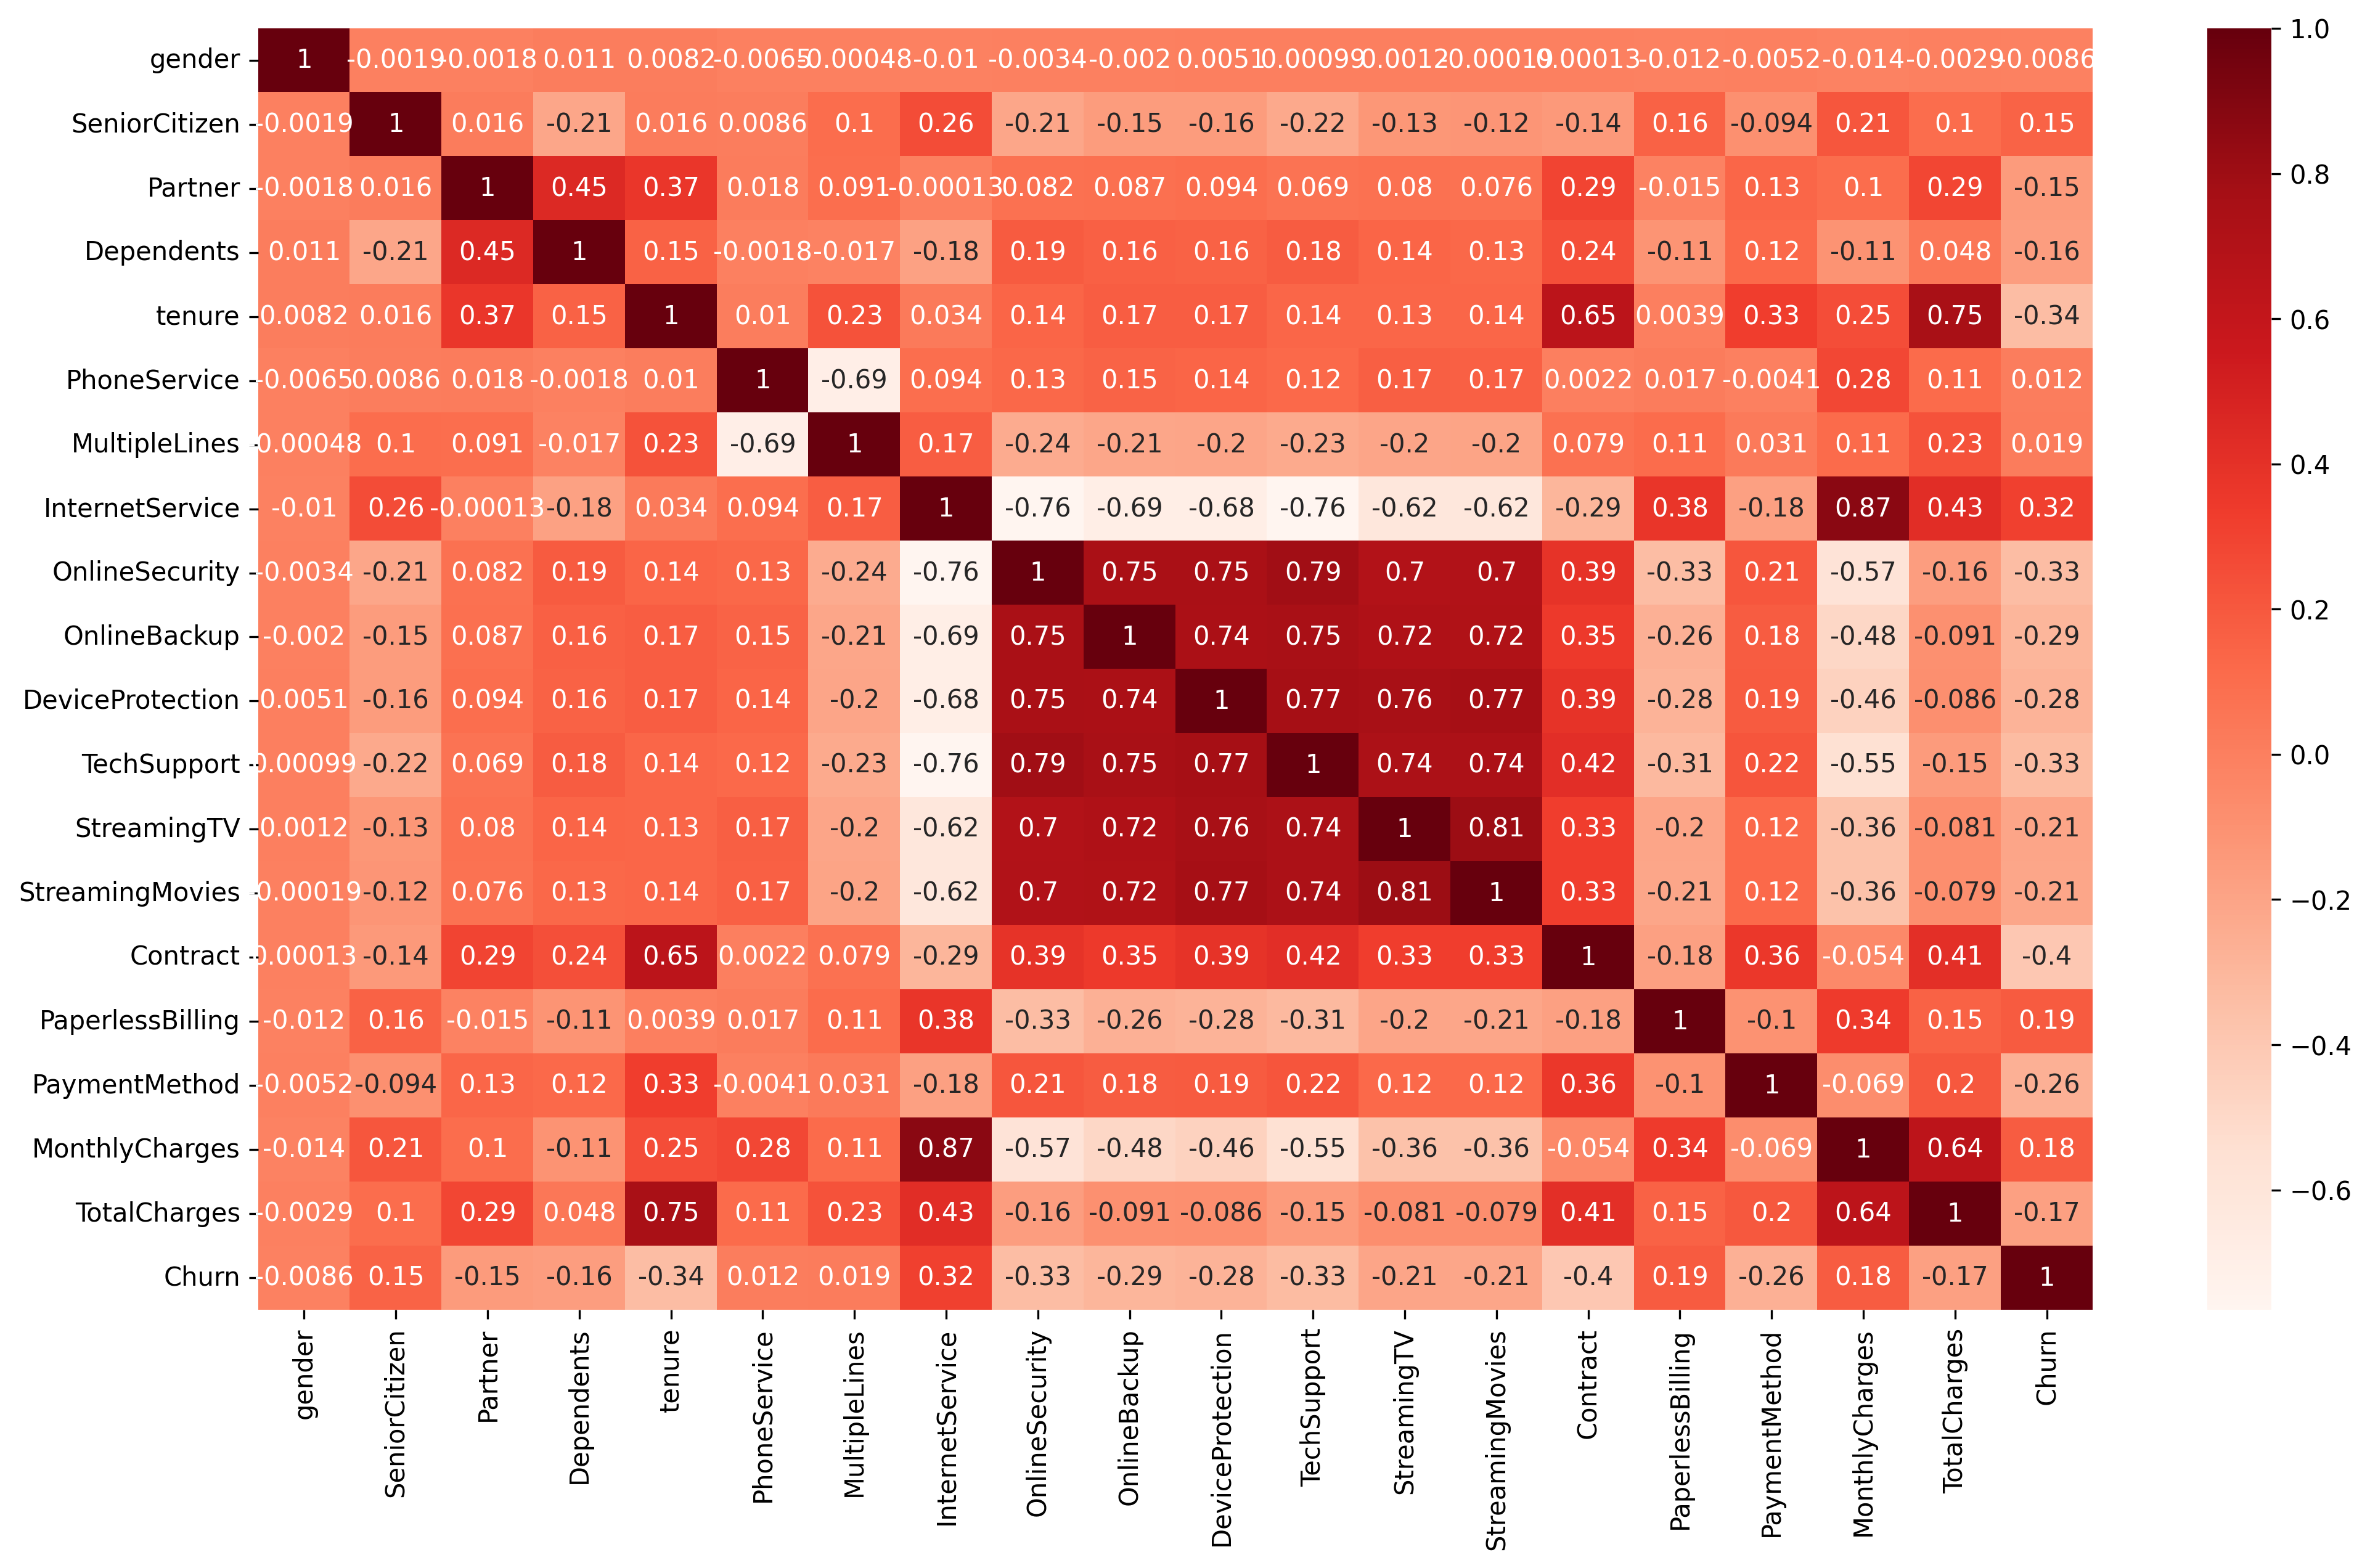

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9),dpi=300)
corr = data.corr()
sns.heatmap(corr, cmap='Reds',annot = True)
plt.show()

In [ ]:
np.set_printoptions(precision=6)
cor = np.abs(data.corr())
path = '/content/drive/MyDrive/list.txt'
f = open(path, 'w')
print(cor['Churn'], file=f)
f.close()
#print(cor[::])
cor.columns
cor['Churn']

gender                0.006115
SeniorCitizen         0.135594
Partner               0.180763
Dependents            0.188740
tenure                0.396433
PhoneService          0.022429
PaperlessBilling      0.236551
MonthlyCharges        0.222647
TotalCharges          0.215013
Churn                 1.000000
InternetService_0     0.292552
InternetService_1     0.142144
InternetService_2     0.349583
OnlineSecurity_0      0.397516
OnlineSecurity_1      0.202025
OnlineSecurity_2      0.292552
OnlineBackup_0        0.313047
OnlineBackup_1        0.101258
OnlineBackup_2        0.292552
DeviceProtection_0    0.282374
DeviceProtection_1    0.068940
DeviceProtection_2    0.292552
TechSupport_0         0.403594
TechSupport_1         0.207578
TechSupport_2         0.292552
Contract_0            0.478774
Contract_1            0.216848
Contract_2            0.384433
PaymentMethod_1       0.334148
PaymentMethod_2       0.092647
PaymentMethod_3       0.134776
PaymentMethod_4       0.188257
Multiple

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import statistics
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn import tree
Depth_value_range = range(1, 5)
X = data.drop('Churn', axis=1)  # 刪除target列之欄位
y = data['Churn']
variables = X.values
type_label = (data['Churn']).values
X_training, X_testing, y_training, y_testing = train_test_split(variables, type_label, test_size=0.3, random_state=1)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  # 定義10折交叉驗證:分層KFold 90/10
i, j = 1, 1
bestMean = [0,0,0,0]
t_bestMean = [0,0,0,0]
bestGroup, bestParm = 0, 0
bestAuc, bestRecall, bestPrec, bestF1 = 0,0,0,0
t, v = [], []
meanAuc_list = []
t_meanAuc_list = []
fprList_best, tprList_best = [], []
for n in Depth_value_range:
    auc_list, recall_list, prec_list, f1_list = [], [], [], []
    t_auc_list, t_recall_list, t_prec_list, t_f1_list = [], [], [], []
    train_index_list, val_index_list = [], []
    fpr_list, tpr_list = [], []
    for train_index, val_index in cv.split(X_training, y_training):
        X_train, X_val = X_training[train_index], X_training[val_index]
        y_train, y_val = y_training[train_index], y_training[val_index]

        model = DecisionTreeClassifier(random_state=i, max_depth=n)
        model.fit(X_train, y_train)  # 訓練
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        predictions_thresholds = model.predict_proba(X_val)[:, 1]
        # print("-------第", i, "組-------")

        fpr, tpr, thresholds = roc_curve(y_val, predictions_thresholds)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

        t_accuracy = sklearn.metrics.accuracy_score(y_train, predictions_train)
        t_recall = sklearn.metrics.recall_score(y_train, predictions_train)
        t_precision = sklearn.metrics.precision_score(y_train, predictions_train)
        t_f1 = sklearn.metrics.f1_score(y_train, predictions_train)
        t_auc_list.append(t_accuracy)
        t_recall_list.append(t_recall)
        t_prec_list.append(t_precision)
        t_f1_list.append(t_f1)

        accuracy = sklearn.metrics.accuracy_score(y_val, predictions_val)
        recall = sklearn.metrics.recall_score(y_val, predictions_val)
        precision = sklearn.metrics.precision_score(y_val, predictions_val)
        f1 = sklearn.metrics.f1_score(y_val, predictions_val)
        auc_list.append(accuracy)
        recall_list.append(recall)
        prec_list.append(precision)
        f1_list.append(f1)
        train_index_list.append(train_index)
        val_index_list.append(val_index)

        if (j == 10):
            t_meanAuc = statistics.mean(t_auc_list)
            meanAuc = statistics.mean(auc_list)
            meanAuc_list.append(meanAuc)

            # print("第", int(i / 10), "組 結果:", auc_list)
            if meanAuc > bestMean[0]:
                # train
                t_meanRecall = statistics.mean(t_recall_list)
                t_meanPrec = statistics.mean(t_prec_list)
                t_meanF1 = statistics.mean(t_f1_list)
                t_bestMean = (t_meanAuc, t_meanRecall, t_meanPrec, t_meanF1)

                # val
                fprList_best = fpr_list
                tprList_best = tpr_list

                meanRecall = statistics.mean(recall_list)
                meanPrec = statistics.mean(prec_list)
                meanF1 = statistics.mean(f1_list)
                bestMean = (meanAuc, meanRecall, meanPrec, meanF1)

                bestAuc_index = auc_list.index(max(auc_list))
                bestAuc = auc_list[bestAuc_index]
                bestRecall = recall_list[bestAuc_index]
                bestPrec = prec_list[bestAuc_index]
                bestF1 = f1_list[bestAuc_index]

                t = train_index_list[bestAuc_index]
                v = val_index_list[bestAuc_index]

                bestGroup = ((bestAuc_index + 1) + (i - 10))
                bestParm = n
            j = 0
        j += 1
        i += 1
foldNum = (bestGroup % 10)
if foldNum == 0:
    foldNum == 10

tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)
for i in range(0, 10):
    tprs.append(np.interp(mean_fpr, fprList_best[i], tprList_best[i]))
    tprs[-1][0] = 0.0
    roc_auc = auc(fprList_best[i], tprList_best[i])
    aucs.append(roc_auc)
    plt.plot(fprList_best[i], tprList_best[i], lw=1, alpha=0.8,
             label='ROC fold %d (AUC = %0.2f)' % ((i + 1), roc_auc))
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=.9)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CrossValidation Roc')
plt.legend(loc="lower right")
plt.show()
print("=========================Data切割狀況=========================")
print("--TRAINING SET--")
print(X_training.shape)
print("-train-")
print(X_train.shape)
print("-validation-")
print(X_val.shape)
print("--TESTING SET--")
print(X_testing.shape)

print("=========================參數最佳化=========================")
bestValue = [bestGroup, bestAuc, bestParm]
bestValue_name = ['最佳組別:', '最佳準確率:', '最佳深度:']  #
bestValue_Chart = pd.DataFrame(bestValue, bestValue_name)
print(bestValue_Chart)

print("=========================預測結果=========================")
print("* 平均最佳： NO.", bestGroup, " (第",int(bestGroup/10+1),"組, fold",foldNum,") *")
model = DecisionTreeClassifier(random_state=bestGroup, max_depth=bestParm)
X_train, X_val = X_training[t], X_training[v]
y_train, y_val = y_training[t], y_training[v]
model.fit(X_train, y_train)  # 訓練

print("\n-Validation-")
predictions_val = model.predict(X_val)
val_score = ScoreReport(y_val, predictions_val)
cm = confusion_matrix(y_val, predictions_val)
print(cm)

print("\n-TEST-")
predictions_test = model.predict(X_testing)
test_score = ScoreReport(y_testing, predictions_test)
cm = confusion_matrix(y_testing, predictions_test)
print(cm)


Scores = {
    "Score" : ['accuracy', 'recall', 'precision', 'f1'],
    "Val(mean)" : bestMean,
    "Val(best)" : val_score,
    "Test" : test_score
}
ScoresChart = pd.DataFrame(Scores)
print(ScoresChart)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=.9)
ax = plt.gca()
val_roc = plot_roc_curve(val, X_val, y_val, ax=ax, color='green')
test_roc = plot_roc_curve(model, X_testing, y_testing, ax=ax, color='orange')
rocshow('ROC')


feature_names = X.columns
target_names = ['noChurn', 'Churn']
#plt.figure(figsize=(50, 50))
#tree.plot_tree(model,  # 填滿顏色, 開啟圓角, 顯示百分比
#          filled=True, rounded=True, proportion=True,
#          feature_names=feature_names,
#          class_names=target_names,
#          fontsize=20,
#          )


NameError: ignored

In [ ]:
print("\n-TEST-")
predictions_test = model.predict(X_testing)
test_score = ScoreReport(y_testing, predictions_test)
cm = confusion_matrix(y_testing, predictions_test)
print(cm)

X = data.drop('Churn', axis=1) # 刪除target列之欄位
y = data['Churn']
variables = X.values
type_label = (data['Churn']).values
X_training, X_testing, y_training, y_testing = train_test_split(variables, type_label, test_size=0.3, random_state=1)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  # 定義10折交叉驗證:分層KFold 90/10

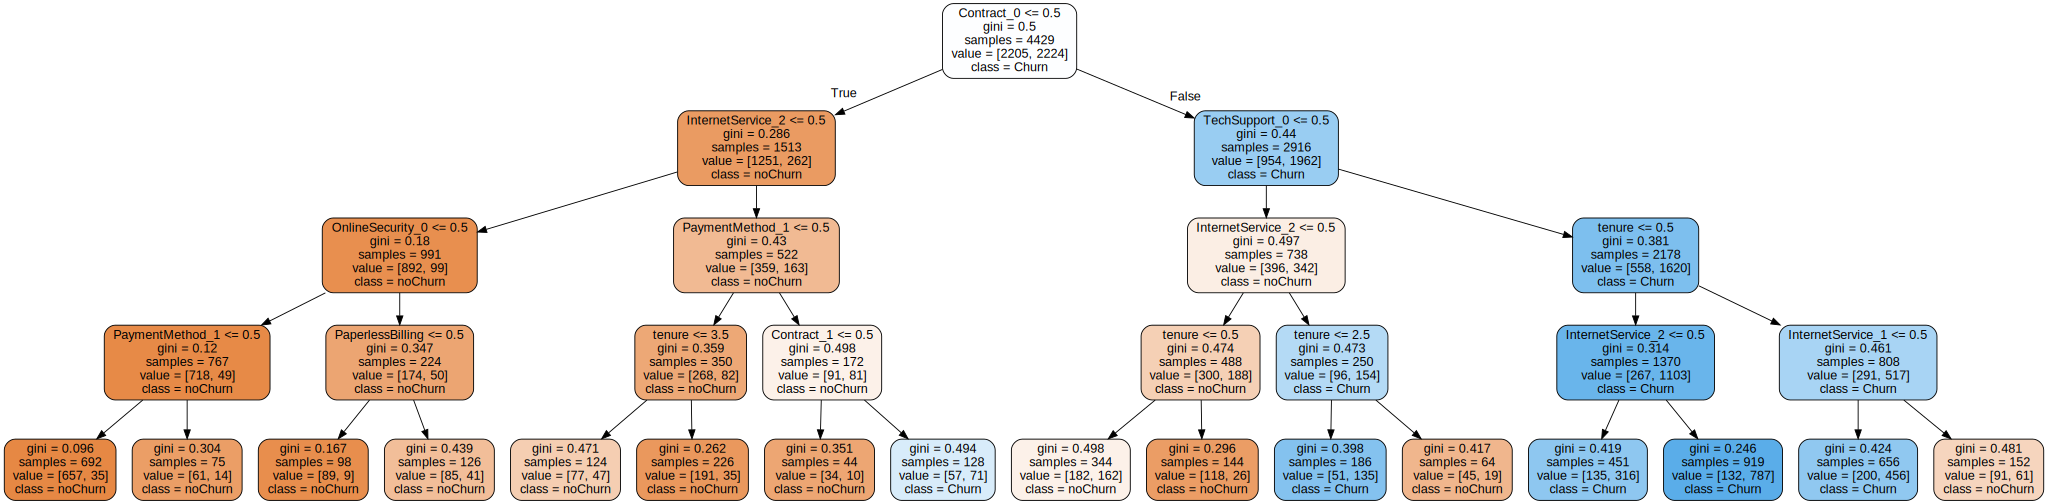

In [ ]:
import graphviz
feature_names = X.columns
target_names = ['noChurn', 'Churn']
dot_data = tree.export_graphviz(model, out_file=None,
                   feature_names=feature_names,
                   class_names=target_names,
                   filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data,format='png')
graph.render('/content/drive/MyDrive/dt2',cleanup=False)
graph

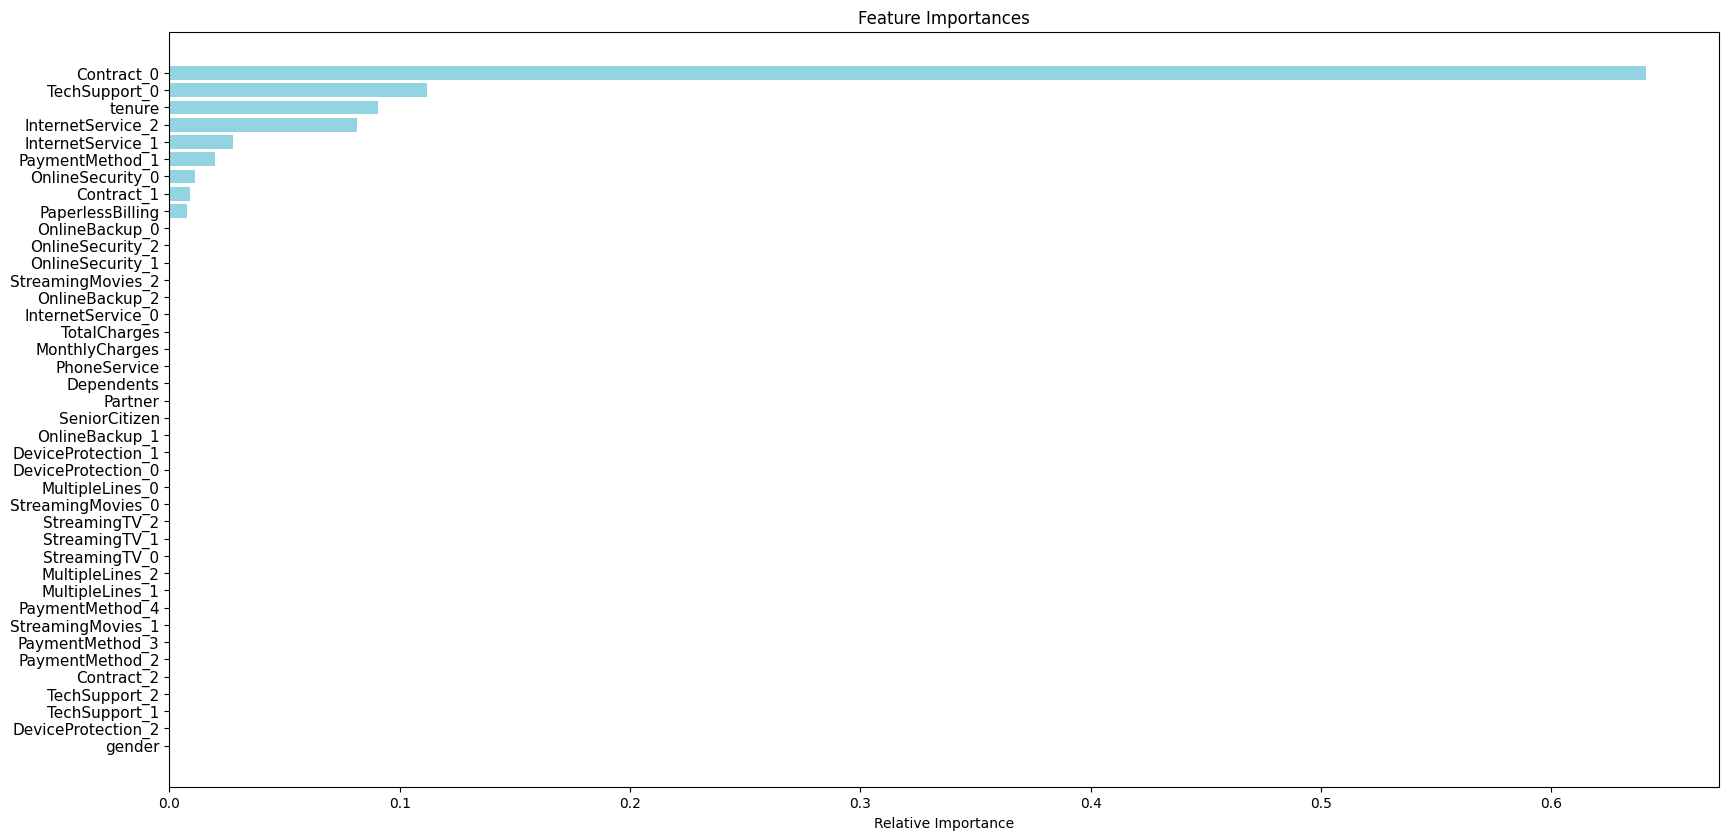

In [ ]:
feature_name = feature_names
importances = model.feature_importances_

## sort importances
indices = np.argsort(importances)

## plot importance bar chart
plt.figure(figsize = (20,10), dpi = 100)

plt.rc('ytick', labelsize=11)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],
         color = '#66C2D7', align = 'center', alpha = 0.7)
plt.yticks(range(len(indices)), np.array(feature_name)[indices])
plt.xlabel('Relative Importance')
plt.style.use('default')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import numpy as np
dx = data
# 取出特徵名稱
X= data[~data["Churn"].isna()]
feature_names = data.columns
pca = PCA().fit(dx)
# 依變異解釋能力找出對應特徵
indexes = np.argmax(np.abs(pca.components_), axis=1)
var_ratio = pca.explained_variance_ratio_ * 100
for i, idx in enumerate(indexes):
    print(f'PC{i+1} ({var_ratio[i]:.5f} %) ' + \
          f'feature {idx} ({feature_names[idx]})')
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn import linear_model
import statistics
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn import tree
from sklearn.metrics import classification_report
Depth_value_range = range(1, 5)
#X = data[~data["Churn"].isna()]
#churn = data[data["Churn"] == 1]
#nochurn = data[data["Churn"] == 0]
Xlog = data.drop('Churn', axis=1)  # 刪除target列之欄位
ylog = data['Churn']

logvariables = PCA(n_components=10).fit_transform(Xlog)
logtype_label = (data['Churn']).values
X_train, X_test, y_train, y_test = train_test_split(logvariables,logtype_label, test_size=0.3, random_state=39)
log = linear_model.LogisticRegression().fit(X_train, y_train)
#model.fit = ()
logpredictions = log.predict(X_test)
logscore = cross_val_score(log, X_train, y_train, cv = 10 ,scoring='accuracy')
print(confusion_matrix(y_test,logpredictions))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("training set score:{:.3f}".format(log.score(X_train,y_train)))
print("test set socre:{:.3f}".format(log.score(X_test, y_test)))
print("ten cross-validation score:{:.3f}".format(np.mean(logscore)))
print(classification_report(y_testing,logpredictions))
#feature_names = X.columns
#target_names = ['noChurn', 'Churn']
log.coef_


PC1 (35.62812 %) feature 4 (tenure)
PC2 (22.02255 %) feature 7 (MonthlyCharges)
PC3 (6.80587 %) feature 11 (InternetService_1)
PC4 (3.85842 %) feature 4 (tenure)
PC5 (3.13445 %) feature 32 (MultipleLines_0)
PC6 (2.56443 %) feature 32 (MultipleLines_0)
PC7 (2.34467 %) feature 17 (OnlineBackup_1)
PC8 (2.21021 %) feature 2 (Partner)
PC9 (2.17849 %) feature 20 (DeviceProtection_1)
PC10 (1.90607 %) feature 0 (gender)
PC11 (1.87541 %) feature 13 (OnlineSecurity_0)
PC12 (1.78793 %) feature 28 (PaymentMethod_1)
PC13 (1.75337 %) feature 39 (StreamingMovies_1)
PC14 (1.57291 %) feature 8 (TotalCharges)
PC15 (1.49540 %) feature 26 (Contract_1)
PC16 (1.43034 %) feature 31 (PaymentMethod_4)
PC17 (1.35694 %) feature 26 (Contract_1)
PC18 (1.18696 %) feature 29 (PaymentMethod_2)
PC19 (1.14885 %) feature 9 (Churn)
PC20 (1.11168 %) feature 1 (SeniorCitizen)
PC21 (0.90730 %) feature 34 (MultipleLines_2)
PC22 (0.83076 %) feature 27 (Contract_2)
PC23 (0.73943 %) feature 3 (Dependents)
PC24 (0.14946 %) featu

array([[-0.211035, -0.876828, -0.244841, -0.447614,  0.389801, -0.045014,
        -0.252154, -0.224106,  0.060571, -0.037313]])

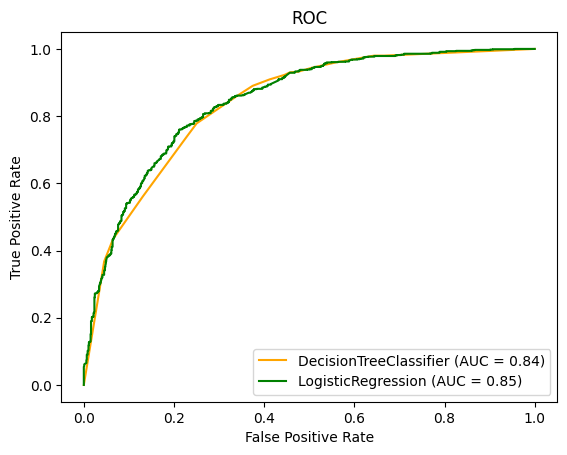

In [ ]:
plt.plot()
ax = plt.gca()
#val_roc = plot_roc_curve(model, X_val, y_val, ax=ax, color='green')
test_roc = plot_roc_curve(model, X_testing, y_testing, ax=ax, color='orange')
log_roc = plot_roc_curve(log, X_test, y_test, ax=ax, color='green')
rocshow('ROC')